# Working with MERFISH data

In [1]:
import stlearn as st

D:\Anaconda3\envs\stlearn\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


Read MERFISH data follow the instruction from scanpy

In [2]:
data = st.ReadMERFISH(count_matrix_file="../pnas.1912459116.sd12.csv",
              spatial_file="../pnas.1912459116.sd15.xlsx")

Quality checking for the data

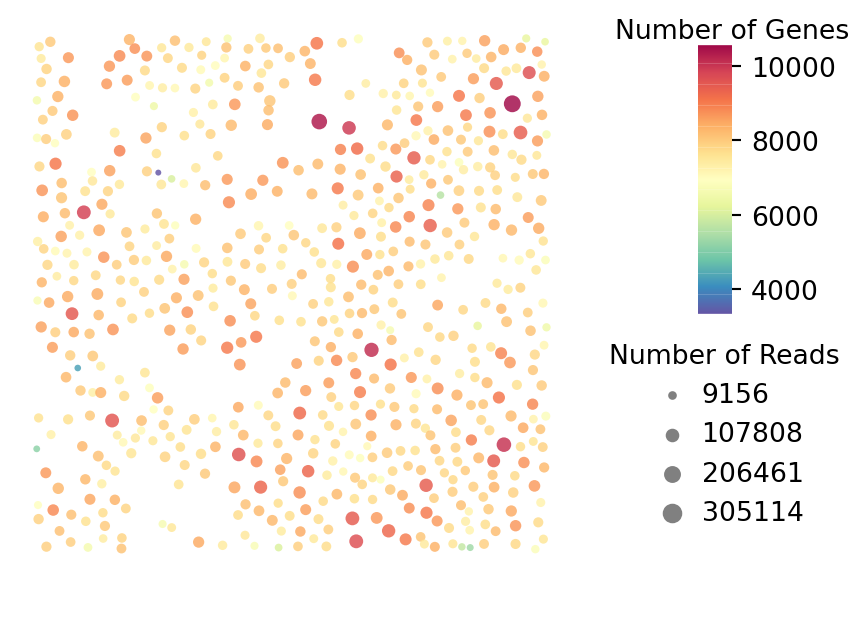

In [3]:
st.pl.QC_plot(data)

Running Preprocessing for MERFISH data

In [4]:
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


Running PCA to reduce the dimensions to 50

In [5]:
st.em.run_pca(data,n_comps=50,random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Perform Louvain clustering

In [6]:
st.pp.neighbors(data,n_neighbors=25)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [7]:
st.tl.clustering.louvain(data)

Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


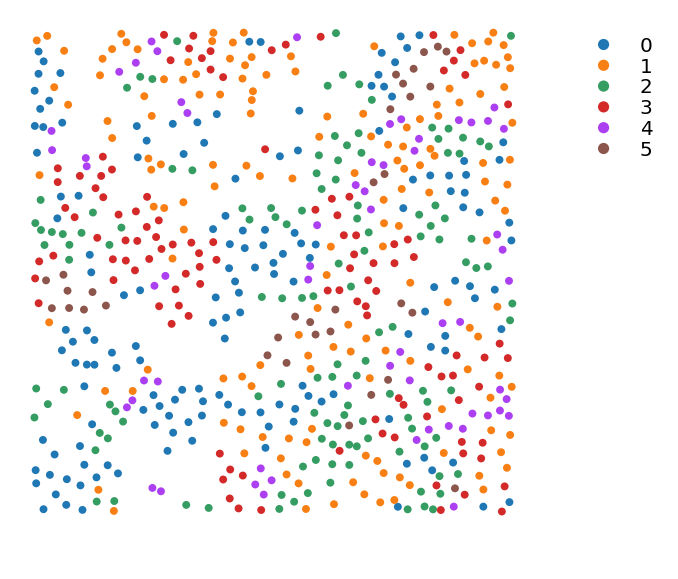

In [8]:
st.pl.cluster_plot(data,use_label="louvain",spot_size=10)